SECTION 1

Problem 1

In [ ]:
class DataSample:
    def __init__(self, features, label):
        """
        Initialize the object with feature list and label string.
        """
        self.features = features
        self.label = label

    def min_max_norm(self):
        """
        Apply min-max normalization:
        Modify self.features in-place.
        Handle case where max == min.
        """
        #Finding the minimum and maximum values in the current list
        min_val = min(self.features)
        max_val = max(self.features)

        #Handling the Edge Case: If max equals min
        if max_val == min_val:
            # The instructions say set all values to 0
            self.features = [0.0 for x in self.features]
            return

        #Applying the formula to every item in the list
        new_features = []
        for x in self.features:
            normalized_value = (x - min_val) / (max_val - min_val)
            new_features.append(normalized_value)

        #Updating the object's features
        self.features = new_features

    def scaled(self, factor):
        #Returning a new list of features where each element is multiplied by factor

        scaled_list = []
        for x in self.features:
            scaled_list.append(x * factor)

        return scaled_list

Problem 2

In [8]:
def sort_by_unique_chars(words):
    # Creating a new list to avoid modifying the original input
    result = words.copy()

    def get_sort_key(word):
        #Helper function to define sorting rules

        unique_count = len(set(word))
        return (-unique_count, word)

    # Sorting the new list
    result.sort(key=get_sort_key)

    return result

Section 2

Problem 1

In [27]:
import numpy as np

#Genrating a 10x10 array with random integers between 0 and 100 (inclusive)
x = np.random.randint(0, 101, (10, 10))

#creating a boolean mask for values >= 20 and <= 50, then replace with -1
mask = (x >= 20) & (x <= 50)
x[mask] = -1

#Extracting 6x6 submatrix
sub = x[2:8, 3:9]

#Extracting diagonal elements of the submatrix
indices = np.arange(6)
diag_vals = sub[indices, indices]

#Constructing 10x10 structured matrix M using broadcasting
i = np.arange(10).reshape(10, 1)  # Column vector
j = np.arange(10)                 # Row vector
M = (i - j)


Problem 2

In [26]:
import numpy as np

#Creating a NumPy array scores of shape 5x4 with values 0-20 (inclusive)
scores = np.random.randint(0, 21, (5, 4))

#Subtracting the max of each row
max_scores = scores.max(axis=1, keepdims=True)
shifted_scores = scores - max_scores

#Computing exponentials
exp_scores = np.exp(shifted_scores)

#Normalizing each row to get probabilities
# Sum of exp values across columns
sum_exp = exp_scores.sum(axis=1, keepdims=True)
probs = exp_scores / sum_exp

#Computng the predicted class
y_pred = np.argmax(probs, axis=1)

# Creating fake truth labels
y_true = np.random.randint(0, 4, 5)

#computing accuracy
correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()

Section 3

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
df = pd.read_csv(url)

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
df1 = df.sort_values(by='math score')
df2 = df.sort_values(by='gender')
df3 = df.sort_values(by='race/ethnicity')

In [32]:
split_index = int(len(df) * 0.2)

test_df = df.iloc[:split_index]
train_df = df.iloc[split_index:]

print(f"Total: {len(df)}, Test: {len(test_df)}, Train: {len(train_df)}")

Total: 1000, Test: 200, Train: 800


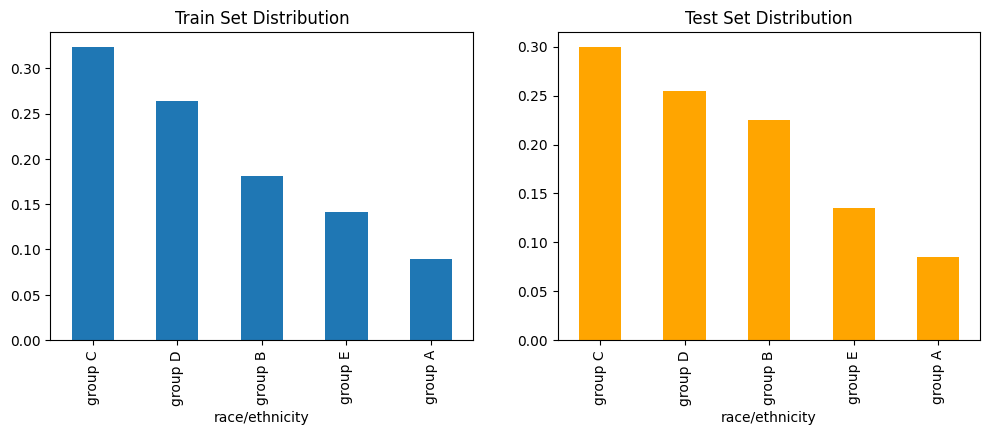

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Train Plot
train_df['race/ethnicity'].value_counts(normalize=True).plot(kind='bar', ax=axes[0], title='Train Set Distribution')

# Test Plot
test_df['race/ethnicity'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], title='Test Set Distribution', color='orange')

plt.show()

In [34]:
test_df_stratified = df.groupby('race/ethnicity', group_keys=False).apply(lambda x: x.sample(frac=0.2))
train_df_stratified = df.drop(test_df_stratified.index)

print("Stratified Test Distribution:\n", test_df_stratified['race/ethnicity'].value_counts(normalize=True))

Stratified Test Distribution:
 race/ethnicity
group C    0.32
group D    0.26
group B    0.19
group E    0.14
group A    0.09
Name: proportion, dtype: float64


/tmp/ipython-input-1889224771.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_stratified = df.groupby('race/ethnicity', group_keys=False).apply(lambda x: x.sample(frac=0.2))


In [35]:
batch_size = 50
batches = [train_df[i : i + batch_size] for i in range(0, len(train_df), batch_size)]

In [36]:
print(f"Number of batches: {len(batches)}")
print("First batch preview:")
print(batches[0].head())

Number of batches: 16
First batch preview:
     gender race/ethnicity parental level of education         lunch  \
200  female        group C          associate's degree      standard   
201  female        group D                some college  free/reduced   
202    male        group C          associate's degree      standard   
203  female        group B          associate's degree      standard   
204    male        group C                some college      standard   

    test preparation course  math score  reading score  writing score  
200               completed          67             84             86  
201                    none          65             81             77  
202                    none          69             77             69  
203                    none          57             69             68  
204                    none          59             41             42  
